In [21]:
import numpy as np # 넘파이 사용
import matplotlib.pyplot as plt # 맷플롯립 사용

In [22]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def sigmoidPrime(z):
    return np.exp(-z)/((1 + np.exp(-z)) ** 2)

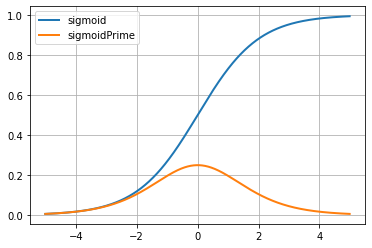

In [23]:
testValues = np.arange(-5,5,0.01)
plt.plot(testValues, sigmoid(testValues), linewidth=2)
plt.plot(testValues, sigmoidPrime(testValues), linewidth=2)
plt.grid(1)
plt.legend(['sigmoid', 'sigmoidPrime'])

In [24]:
X = np.array(([3,5], [5,1], [10,2]), dtype=float)
y = np.array(([75], [82], [93]), dtype=float)

In [25]:
# Whole Class with additions:
class Neural_Network(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        
        return dJdW1, dJdW2

In [41]:
NN = Neural_Network()

X = np.array([[3,5],[5,1],[10,2]])
Y = np.array([75,82,93])

cost1 = NN.costFunction(X,y)
print("cost", cost1)

dJdW1, dJdW2 = NN.costFunctionPrime(X,y)
print("dJdW1", dJdW1)
print("dJdW2", dJdW2)

cost [10416.73323983]
dJdW1 [[12.82531325 -9.30227576 -0.5488059 ]
 [21.28618584 -1.93745213 -0.44832143]]
dJdW2 [[-49.81099052]
 [-49.11174499]
 [-53.46519713]]


In [42]:
scalar = 3
NN.W1 = NN.W1 + scalar*dJdW1
NN.W2 = NN.W2 + scalar*dJdW2
cost2 = NN.costFunction(X,y)

In [43]:
print(cost1, cost2)

[10416.73323983] [10499.]


In [44]:
dJdW1, dJdW2 = NN.costFunctionPrime(X,y)
NN.W1 = NN.W1 - scalar*dJdW1
NN.W2 = NN.W2 - scalar*dJdW2
cost3 = NN.costFunction(X, y)

In [45]:
print(cost2, cost3)

[10499.] [10499.]
